<a href="https://colab.research.google.com/github/Magero-Steven/Global-south-debt-analysis-and-impact/blob/main/Mental_Health_%3BSimple_Machine_Learning_2025.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
from sklearn import linear_model
from sklearn.model_selection import train_test_split


In [ ]:
# Check for missing values
print(df.isnull().sum())

Name                            0
Age                             0
Marital Status                  0
Education Level                 0
Number of Children              0
Smoking Status                  0
Physical Activity Level         0
Employment Status               0
Income                          0
Alcohol Consumption             0
Dietary Habits                  0
Sleep Patterns                  0
History of Mental Illness       0
History of Substance Abuse      0
Family History of Depression    0
Chronic Medical Conditions      0
dtype: int64


In [ ]:
# Check for missing values in 'Income' and 'History of Mental Illness'
print(df[['Income', 'History of Mental Illness']].isnull().sum())

# Drop rows with missing values in these columns

df_clean = df.dropna(subset=['Income', 'History of Mental Illness'])


Income                       0
History of Mental Illness    0
dtype: int64


In [ ]:
# Convert 'Yes' to 1 and 'No' to 0
df_clean['History of Mental Illness'] = df_clean['History of Mental Illness'].map({'Yes': 1, 'No': 0})


In [ ]:
  # Calculate correlation
  correlation = df_clean['Income'].corr(df_clean['History of Mental Illness'])
  print(f'Correlation coefficient: {correlation}')
#A correlation coefficient of approximately -0.137 indicates a weak negative correlation between two variables. This means that as one variable slightly increases, the other has a slight tendency to decrease, but the relationship is weak and not very strong or consistent. Essentially, the two variables have a minor inverse relationship, and other factors might be at play affecting their behavior.



Correlation coefficient: -0.13680475594358885


In [ ]:
#Logistic Regression
import statsmodels.api as sm

  # Define the independent variable (adding a constant for the intercept)
X = sm.add_constant(df_clean['Income'])
  # Define the dependent variable
y = df_clean['History of Mental Illness']

  # Fit the logistic regression model
model = sm.Logit(y, X).fit()
print(model.summary())


Optimization terminated successfully.
         Current function value: 0.604388
         Iterations 5
                               Logit Regression Results                              
Dep. Variable:     History of Mental Illness   No. Observations:               413768
Model:                                 Logit   Df Residuals:                   413766
Method:                                  MLE   Df Model:                            1
Date:                       Wed, 16 Apr 2025   Pseudo R-squ.:                 0.01613
Time:                               09:46:09   Log-Likelihood:            -2.5008e+05
converged:                              True   LL-Null:                   -2.5418e+05
Covariance Type:                   nonrobust   LLR p-value:                     0.000
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.4428      0.005    -82.125      0.0

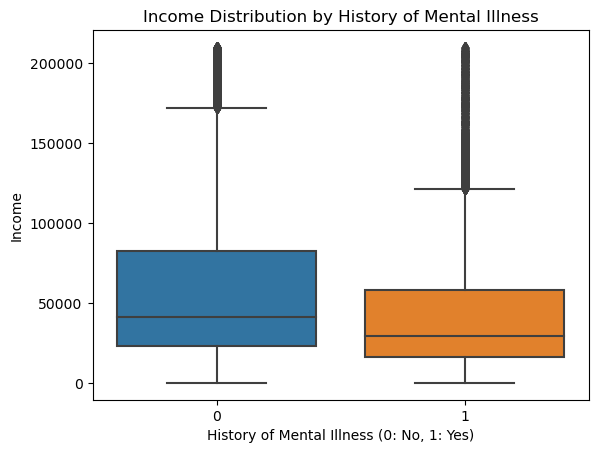

In [ ]:
  import seaborn as sns
  import matplotlib.pyplot as plt

  sns.boxplot(x='History of Mental Illness', y='Income', data=df_clean)
  plt.title('Income Distribution by History of Mental Illness')
  plt.xlabel('History of Mental Illness (0: No, 1: Yes)')
  plt.ylabel('Income')
  plt.show()


In [ ]:
  sns.regplot(x='Income', y='History of Mental Illness', data=df_clean, logistic=True)
  plt.title('Income vs. Probability of History of Mental Illness')
  plt.xlabel('Income')
  plt.ylabel('Probability of History of Mental Illness')
  plt.show()


In [ ]:

#This output is the result of a **logistic regression model**, a statistical technique used to analyze the relationship between a dependent variable (here, "History of Mental Illness") and one or more independent variables (like "Income"). Let me break it down for you step by step:

1. **Optimization terminated successfully**: This indicates that the process of finding the best-fitting model for the data (via Maximum Likelihood Estimation) was successful.

2. **Current function value (0.604388)**: This is the minimized value of the likelihood function, essentially indicating how well the model fits the data. Lower values suggest a better fit, but context matters.

3. **Logit Regression Results**:
   - **Dependent Variable**: "History of Mental Illness" is the target variable being modeled.
   - **No. of Observations (413,768)**: This is the total number of data points analyzed.
   - **Df Residuals (413,766)**: Degrees of freedom left after estimating the parameters.
   - **Df Model (1)**: This shows there was one explanatory (independent) variable in the model, which is "Income."

4. **Pseudo R-squared (0.01613)**: A measure of how well the independent variable(s) explain variation in the dependent variable. A value of 0.01613 means the model only explains a small portion of the variability in the data.

5. **Converged: True**: This means the algorithm successfully found a stable solution.

6. **Coefficients (coef)**:
   - **const (-0.4428)**: This is the intercept of the model, which can be interpreted as the baseline log-odds of the dependent variable when the independent variable ("Income") is zero.
   - **Income (-8.033e-06)**: A very small, negative coefficient. This indicates that as "Income" increases, the likelihood of having a "History of Mental Illness" decreases slightly. However, the effect size is minimal.

7. **Standard Error (std err)**: Indicates the variability of the coefficient estimates.
   - For "Income," this is very small, meaning the estimate is precise.

8. **z-statistic & P-value (P>|z|)**:
   - For "Income," the z-statistic is -86.9, and the p-value is <0.05. This means the relationship between "Income" and "History of Mental Illness" is statistically significant.
   - However, keep in mind that statistical significance doesn't always mean the relationship is meaningful in practical terms—especially with such a small effect size.

9. **Confidence Interval [0.025, 0.975]**: This gives a range within which the true value of the coefficient is likely to fall 95% of the time. For "Income," it's between -8.21e-06 and -7.85e-06, reinforcing its small, negative impact.



10. **Likelihood Ratio (LLR) p-value (0.000)**: This confirms that the model is a better fit than a null model with no predictors.

In summary, the model suggests a statistically significant but extremely small negative relationship between "Income" and "History of Mental Illness." This means as income increases slightly, the odds of reporting a history of mental illness slightly decrease. However, the practical importance is minimal given the tiny effect size. Does this align with your expectations or context?

In [ ]:
#PREDICT HISTORY OF MENTAL ILLINESS
#Drop irrelevant columns (e.g., Name).
# Drop the 'Name' column
df_clean = df_clean.drop(columns=['Name'])
#Encode categorical variables (e.g., Marital Status, Education Level) using pd.get_dummies or LabelEncoder.
# Encode categorical variables
df_encoded = pd.get_dummies(df_clean, columns=[
    'Marital Status', 'Education Level', 'Employment Status',
    'Physical Activity Level', 'Smoking Status', 'Alcohol Consumption',
    'Dietary Habits', 'Sleep Patterns', 'History of Substance Abuse',
    'Family History of Depression', 'Chronic Medical Conditions'
])

# Define features (X) and target (y)
X = df_encoded.drop(columns=['History of Mental Illness'])
y = df_encoded['History of Mental Illness']

# Split data into train/test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)



In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

# Initialize and train the model
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

# Predict on test data
y_pred = model.predict(X_test)

# Evaluate
print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

In [ ]:
importances = model.feature_importances_
feature_names = X.columns
feature_importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': importances})
feature_importance_df.sort_values(by='Importance', ascending=False, inplace=True)
print(feature_importance_df.head(10))